In [194]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df = pd.read_csv(r"C:\Users\91878\Downloads\twitter_disaster (1).csv")

In [196]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [197]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [199]:
df['keyword'] = df['keyword'].fillna(df['keyword'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [200]:
df.isnull().sum()

id          0
keyword     0
location    0
text        0
target      0
dtype: int64

In [201]:
df.drop(columns=['id'],inplace=True)

In [202]:
df

,keyword,location,text,target
0,fatalities,USA,Our Deeds are the Reason of this #earthquake M...,1
1,fatalities,USA,Forest fire near La Ronge Sask. Canada,1
2,fatalities,USA,All residents asked to 'shelter in place' are ...,1
3,fatalities,USA,"13,000 people receive #wildfires evacuation or...",1
4,fatalities,USA,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,fatalities,USA,Two giant cranes holding a bridge collapse int...,1
7609,fatalities,USA,@aria_ahrary @TheTawniest The out of control w...,1
7610,fatalities,USA,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,fatalities,USA,Police investigating after an e-bike collided ...,1


In [203]:
df['keyword'].nunique()

221

In [204]:
df['location'].nunique()

3341

In [205]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [206]:
df['keyword']=lb.fit_transform(df['keyword'])
df['location']=lb.fit_transform(df['location'])

In [207]:
df.head()

,keyword,location,text,target
0,104,2643,Our Deeds are the Reason of this #earthquake M...,1
1,104,2643,Forest fire near La Ronge Sask. Canada,1
2,104,2643,All residents asked to 'shelter in place' are ...,1
3,104,2643,"13,000 people receive #wildfires evacuation or...",1
4,104,2643,Just got sent this photo from Ruby #Alaska as ...,1


In [208]:
df.duplicated().sum()

52

In [209]:
df= df.drop_duplicates(keep ='first')

In [210]:
df.duplicated().sum()

0

In [211]:
!pip install nltk

In [212]:
import nltk

In [213]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [214]:
df['num_characters'] = df['text'].apply(len)
# it shows the length of each tweet (total character used in each tweet)

In [215]:
df.head()

,keyword,location,text,target,num_characters
0,104,2643,Our Deeds are the Reason of this #earthquake M...,1,69
1,104,2643,Forest fire near La Ronge Sask. Canada,1,38
2,104,2643,All residents asked to 'shelter in place' are ...,1,133
3,104,2643,"13,000 people receive #wildfires evacuation or...",1,65
4,104,2643,Just got sent this photo from Ruby #Alaska as ...,1,88


In [216]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
# Break the sentence into number of words

In [217]:
df.head()

,keyword,location,text,target,num_characters,num_words
0,104,2643,Our Deeds are the Reason of this #earthquake M...,1,69,14
1,104,2643,Forest fire near La Ronge Sask. Canada,1,38,8
2,104,2643,All residents asked to 'shelter in place' are ...,1,133,24
3,104,2643,"13,000 people receive #wildfires evacuation or...",1,65,9
4,104,2643,Just got sent this photo from Ruby #Alaska as ...,1,88,18


In [218]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
# Break the whole sentence into the number of sentences in it 

In [219]:
df

,keyword,location,text,target,num_characters,num_words,num_sentences
0,104,2643,Our Deeds are the Reason of this #earthquake M...,1,69,14,1
1,104,2643,Forest fire near La Ronge Sask. Canada,1,38,8,2
2,104,2643,All residents asked to 'shelter in place' are ...,1,133,24,2
3,104,2643,"13,000 people receive #wildfires evacuation or...",1,65,9,1
4,104,2643,Just got sent this photo from Ruby #Alaska as ...,1,88,18,1
...,...,...,...,...,...,...,...
7608,104,2643,Two giant cranes holding a bridge collapse int...,1,83,13,1
7609,104,2643,@aria_ahrary @TheTawniest The out of control w...,1,125,24,2
7610,104,2643,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65,15,2
7611,104,2643,Police investigating after an e-bike collided ...,1,137,21,2


# Checking Outiers

In [221]:
numerical_column = df.select_dtypes(include=['number']).columns
for i in numerical_column:
    Q1 = df[i].quantile(0.25)
    print("The first quantile for the column", i, "is given by", Q1)
    Q2 = df[i].quantile(0.50)
    print("The second quantile for the column", i, "is given by", Q2)
    Q3 = df[i].quantile(0.75)
    print("The third quantile for the column", i, "is given by", Q3)
    IQR = Q3 - Q1
    print("The interquartile range for the column", i, "is given by", IQR)
    LL = Q1 - 1.5 * IQR
    print("The lower limit for the column", i, "is given by", LL)
    UL = Q3 + 1.5 * IQR
    print("The upper limit for the column", i, "is given by", UL)
    n = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers for column", i, "is given by", n)
    df[i] = np.where((df[i] < LL) | (df[i] > UL), df[i].mean(), df[i])
    m = df[(df[i] < LL) | (df[i] > UL)].shape[0]
    print("The number of outliers after imputation for column", i, "is given by", m)
    print("   ")
    print("   ")

The first quantile for the column keyword is given by 55.0
The second quantile for the column keyword is given by 108.0
The third quantile for the column keyword is given by 165.0
The interquartile range for the column keyword is given by 110.0
The lower limit for the column keyword is given by -110.0
The upper limit for the column keyword is given by 330.0
The number of outliers for column keyword is given by 0
The number of outliers after imputation for column keyword is given by 0
   
   
The first quantile for the column location is given by 1330.0
The second quantile for the column location is given by 2485.0
The third quantile for the column location is given by 2643.0
The interquartile range for the column location is given by 1313.0
The lower limit for the column location is given by -639.5
The upper limit for the column location is given by 4612.5
The number of outliers for column location is given by 0
The number of outliers after imputation for column location is given by 0


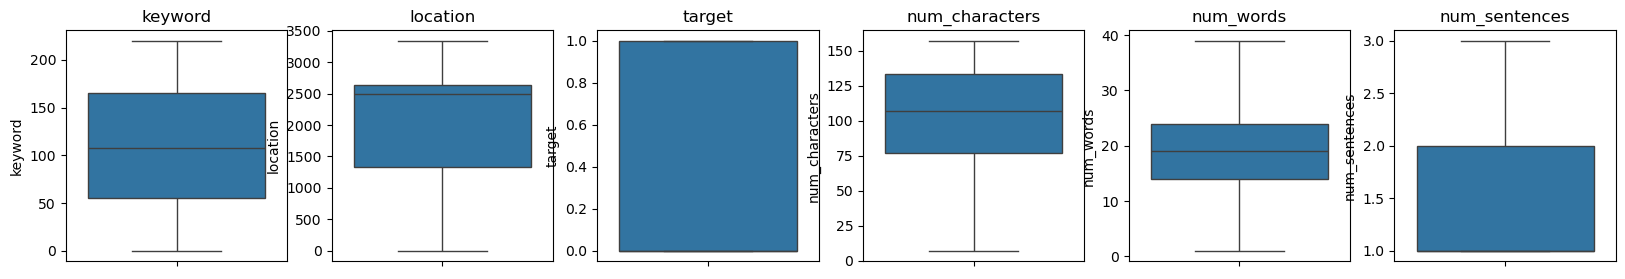

In [222]:
numerical = df.select_dtypes(include=['number']).columns
num_cols = 6  # Define the number of columns per row
num_rows = math.ceil(len(numerical) / num_cols)  # Ensure correct row calculation
plt.figure(figsize=(20, num_rows * 3)) 
for i, col in enumerate(numerical, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=df[col])
    plt.title(col)

## EDA

In [224]:
df['target'].value_counts()

target
0.0    4322
1.0    3239
Name: count, dtype: int64

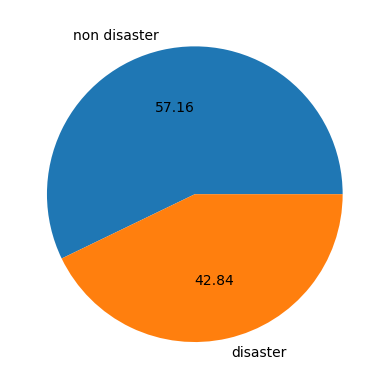

In [225]:
import matplotlib.pyplot  as plt
plt.pie(df['target'].value_counts(),labels=['non disaster','disaster'],autopct= '%0.2f')
plt.show()

In [226]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,7561.000000,7561.000000,7561.000000
mean,100.924084,18.848139,1.433291
std,33.789044,6.746788,0.645494
min,7.000000,1.000000,1.000000
25%,77.000000,14.000000,1.000000
50%,107.000000,19.000000,1.000000
75%,133.000000,24.000000,2.000000
max,157.000000,39.000000,3.000000


In [227]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()
# describe for the non disaster

,num_characters,num_words,num_sentences
count,4322.000000,4322.000000,4322.000000
mean,95.622166,18.551546,1.504157
std,35.908528,7.227963,0.672290
min,7.000000,1.000000,1.000000
25%,68.000000,13.000000,1.000000
50%,101.000000,19.000000,1.000000
75%,130.000000,24.000000,2.000000
max,157.000000,39.000000,3.000000


In [228]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()
# Describe for the disaster

,num_characters,num_words,num_sentences
count,3239.000000,3239.000000,3239.000000
mean,107.998765,19.243902,1.338730
std,29.280258,6.023767,0.594996
min,14.000000,2.000000,1.000000
25%,88.000000,15.000000,1.000000
50%,114.000000,20.000000,1.000000
75%,135.000000,24.000000,2.000000
max,151.000000,39.000000,3.000000


In [229]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

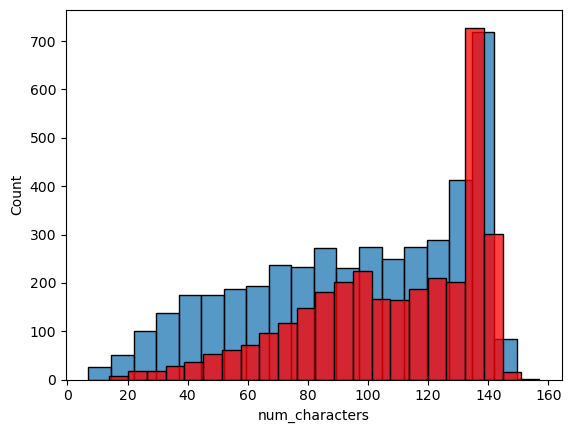

In [230]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='Red')

<Axes: xlabel='num_characters', ylabel='Count'>

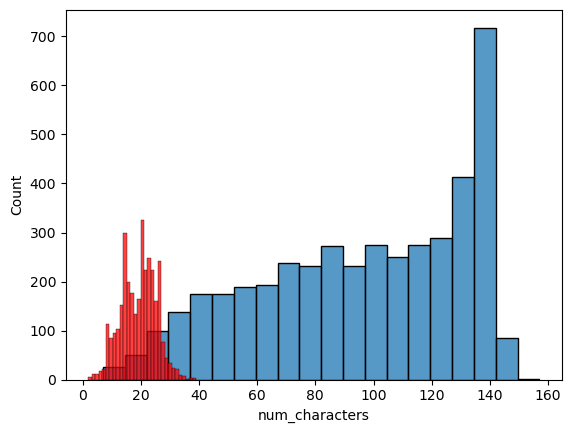

In [231]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_words'],color='Red')

<Axes: xlabel='num_words', ylabel='Count'>

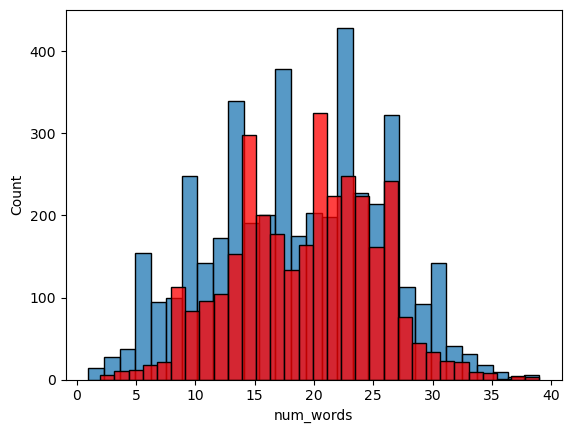

In [232]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='Red')

<Axes: xlabel='num_sentences', ylabel='Count'>

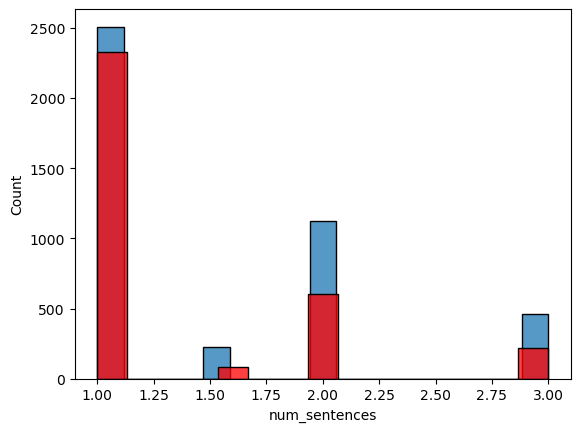

In [233]:
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='Red')

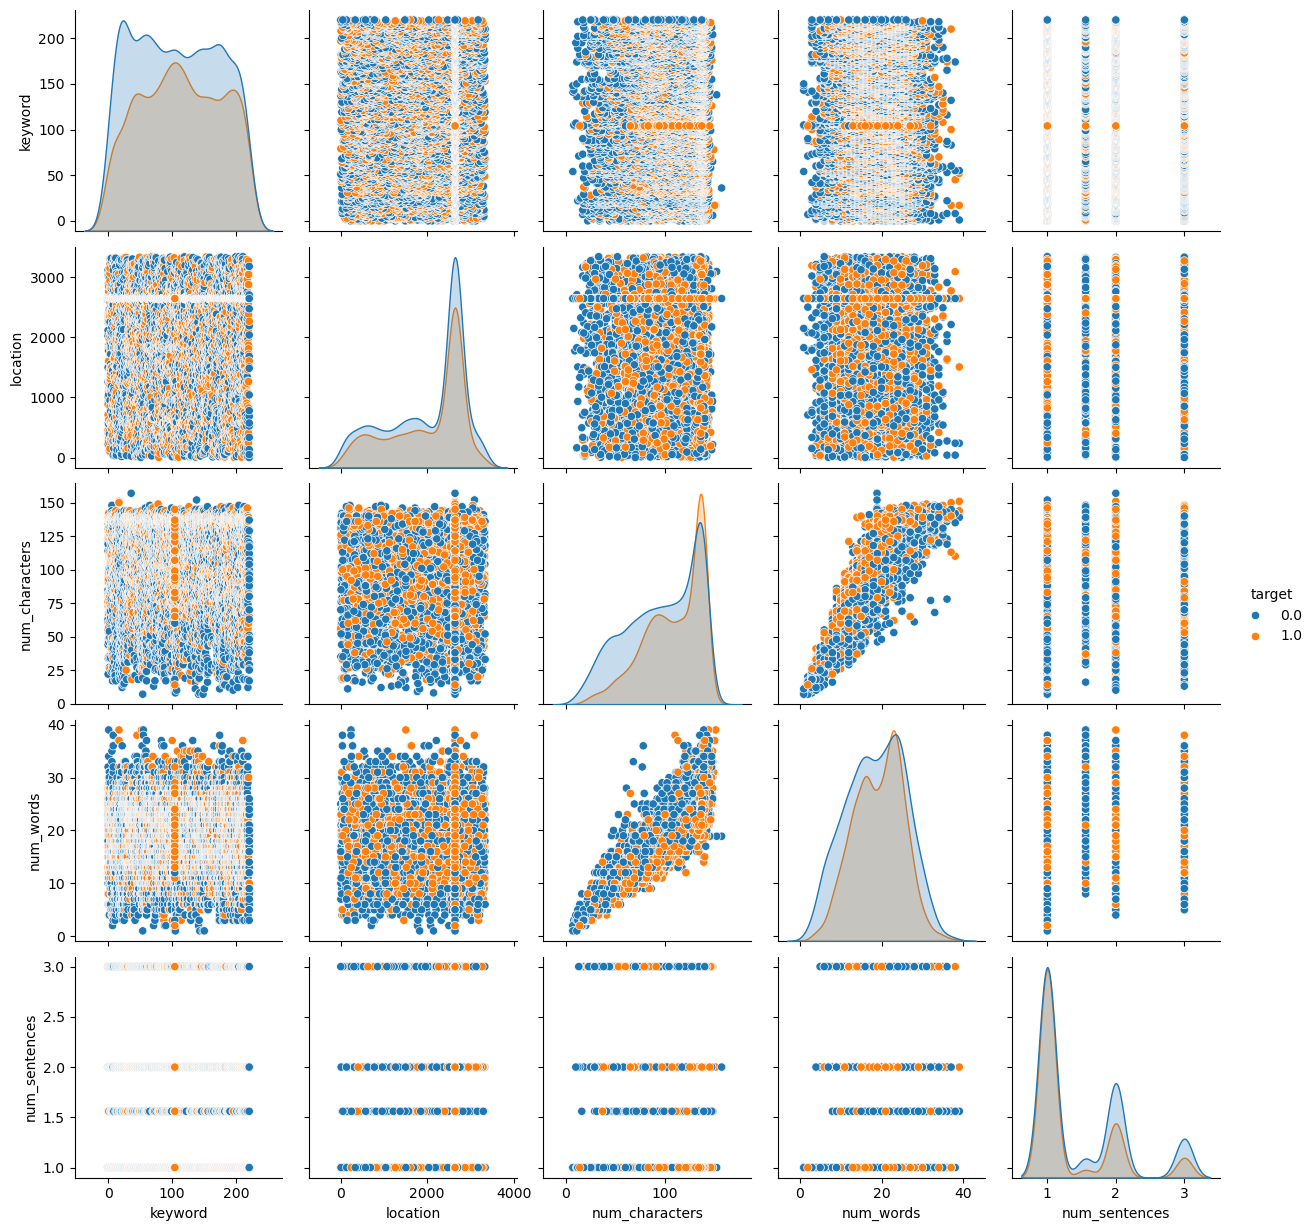

In [234]:
sns.pairplot(df,hue='target')

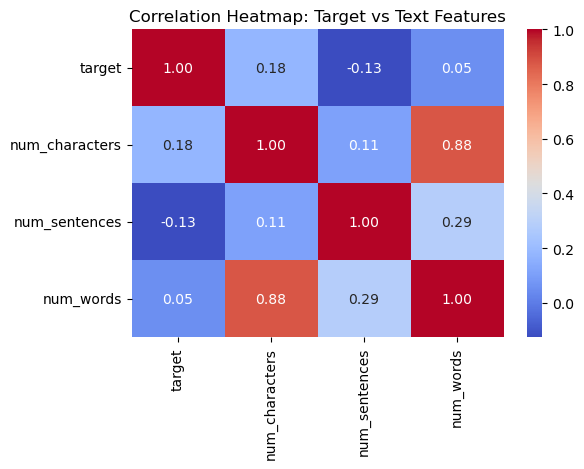

In [235]:
heatmap_cols = ['target', 'num_characters', 'num_sentences', 'num_words']
correlation_matrix = df[heatmap_cols].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Target vs Text Features")
plt.show()

In [236]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [237]:
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for word in text:
        if word.isalnum():
            y.append(word)

    text = []
    for word in y:
        if word not in stopwords.words('english') and word not in string.punctuation:
            text.append(word)

    y = []
    for word in text:
        y.append(ps.stem(word))

    return " ".join(y)

In [238]:
df['transformed_text']=df['text'].apply(transform_text)

In [239]:
df.head()

,keyword,location,text,target,num_characters,num_words,num_sentences,transformed_text
0,104.0,2643.0,Our Deeds are the Reason of this #earthquake M...,1.0,69.0,14.0,1.0,deed reason earthquak may allah forgiv us
1,104.0,2643.0,Forest fire near La Ronge Sask. Canada,1.0,38.0,8.0,2.0,forest fire near la rong sask canada
2,104.0,2643.0,All residents asked to 'shelter in place' are ...,1.0,133.0,24.0,2.0,resid ask place notifi offic evacu shelter pla...
3,104.0,2643.0,"13,000 people receive #wildfires evacuation or...",1.0,65.0,9.0,1.0,peopl receiv wildfir evacu order california
4,104.0,2643.0,Just got sent this photo from Ruby #Alaska as ...,1.0,88.0,18.0,1.0,got sent photo rubi alaska smoke wildfir pour ...


In [240]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [241]:
disaster_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

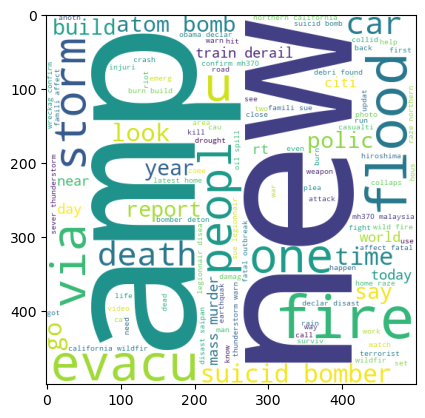

In [242]:
plt.imshow(disaster_wc)

In [243]:
nondisaster_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

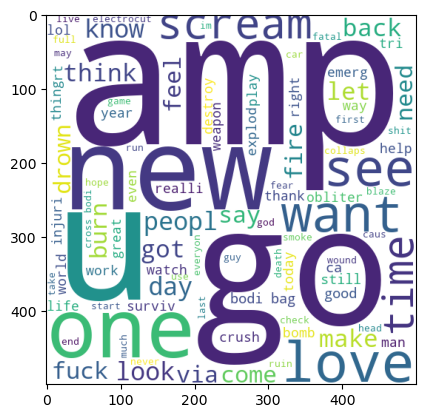

In [244]:
plt.imshow(nondisaster_wc)

In [245]:
disaster_corpus = []
for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        disaster_corpus.append(word)

In [246]:
len(disaster_corpus) # it shows total no. of words used in disaster

32966

In [247]:
from collections import Counter
pd.DataFrame(Counter(disaster_corpus).most_common(30))

,0,1
0,http,2501
1,fire,264
2,bomb,174
3,kill,158
4,news,140
5,amp,135
6,via,121
7,flood,120
8,disast,119
9,crash,113


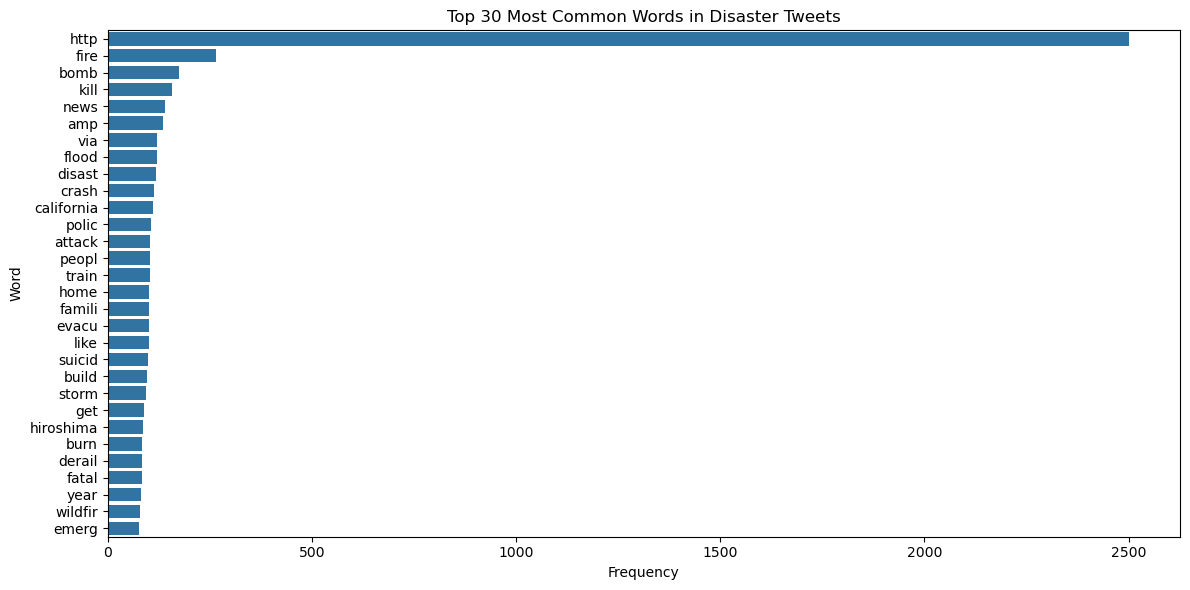

In [248]:
word_freq = Counter(disaster_corpus).most_common(30)

df_word_freq = pd.DataFrame(word_freq, columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq)
plt.title('Top 30 Most Common Words in Disaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [249]:
nondisaster_corpus = []
for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        nondisaster_corpus.append(word)

In [250]:
len(nondisaster_corpus) # it shows total no. of words used in nondisaster

39044

In [251]:
from collections import Counter
pd.DataFrame(Counter(nondisaster_corpus).most_common(30))

,0,1
0,http,2194
1,like,307
2,get,221
3,amp,208
4,new,168
5,go,141
6,one,135
7,love,116
8,bodi,114
9,bag,109


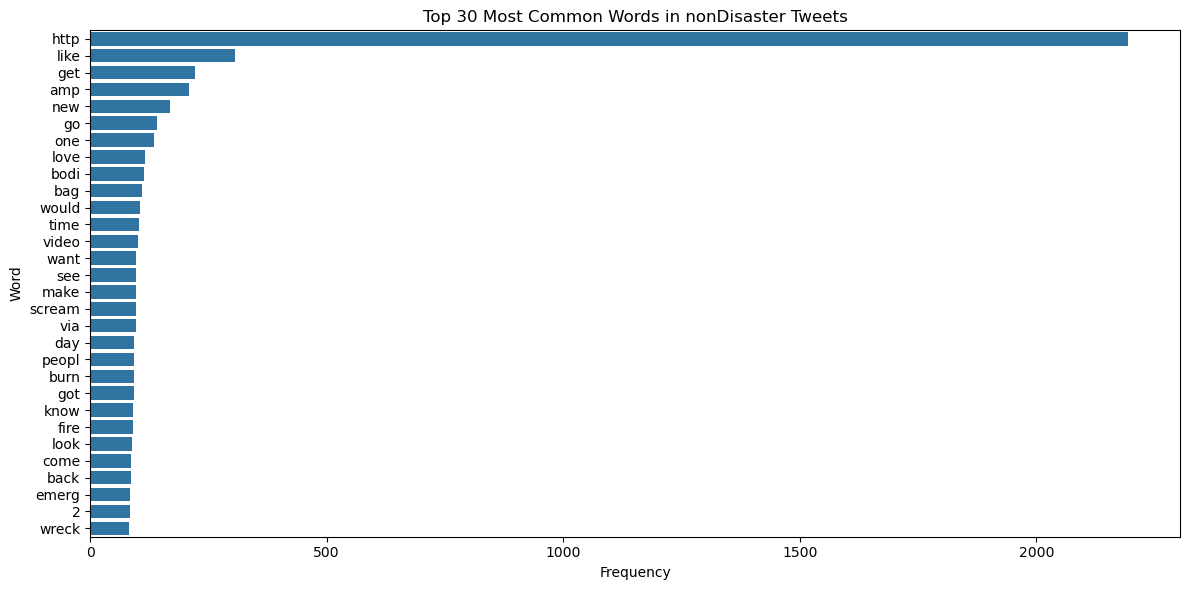

In [252]:
word_freq = Counter(nondisaster_corpus).most_common(30)

df_word_freq = pd.DataFrame(word_freq, columns=['word', 'frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq)
plt.title('Top 30 Most Common Words in nonDisaster Tweets')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

# MODEL BUILDING

In [254]:
# Text Vectorization 
# Using Bag of words

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [256]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [257]:
X.shape

(7561, 13024)

In [258]:
y =(df['target']).values

In [259]:
y

array([1., 1., 1., ..., 1., 1., 1.])

In [260]:
from sklearn.model_selection import train_test_split

In [261]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [262]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [263]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [264]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.5988103106411103
[[370 496]
 [111 536]]
0.5193798449612403


In [265]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8010575016523463
[[726 140]
 [161 486]]
0.7763578274760383


In [266]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8043621943159286
[[778  88]
 [208 439]]
0.8330170777988615


In [267]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [268]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [269]:
clfs = {
    'Support Vector Classifier'       : svc,
    'K-Nearest Neighbors'             : knc,
    'Decision Tree'                   : dtc,
    'Random Forest'                   : rfc,
}

In [270]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [271]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.6067415730337079, 0.5398773006134969)

In [272]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For Support Vector Classifier
Accuracy - 0.6067415730337079
Precision - 0.5398773006134969
For K-Nearest Neighbors
Accuracy - 0.7217448777263714
Precision - 0.8228571428571428
For Decision Tree
Accuracy - 0.6219431592861864
Precision - 0.5441696113074205
For Random Forest
Accuracy - 0.7614011896893589
Precision - 0.7628676470588235


In [273]:
performance_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores})

In [274]:
performance_df

,Algorithm,Accuracy,Precision
0,Support Vector Classifier,0.606742,0.539877
1,K-Nearest Neighbors,0.721745,0.822857
2,Decision Tree,0.621943,0.544170
3,Random Forest,0.761401,0.762868


## DEEPLEARNING

In [ ]:
# Step 1: Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten



In [ ]:
# Step 2: Text Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['transformed_text'])
X_seq = tokenizer.texts_to_sequences(df['transformed_text'])

In [ ]:
# Step 3: Padding
X_pad = pad_sequences(X_seq, maxlen=50)


In [ ]:
# Step 4: Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, df['target'], test_size=0.2, random_state=42)

In [ ]:
# 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(X_pad, df['target'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2


## ANN

In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(X_pad, y, test_size=0.2, random_state=42)
max_len = 50 

model_ann = Sequential()
model_ann.add(Embedding(input_dim=5000, output_dim=64, input_length=max_len))
model_ann.add(GlobalAveragePooling1D())
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(1, activation='sigmoid'))
from tensorflow.keras.callbacks import EarlyStopping

model_ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(patience=2, restore_best_weights=True)

model_ann.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=10, batch_size=32, callbacks=[early_stop])

Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5310 - loss: 0.6887 - val_accuracy: 0.5966 - val_loss: 0.6687
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5621 - loss: 0.6770 - val_accuracy: 0.7149 - val_loss: 0.6481
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.6765 - loss: 0.6161 - val_accuracy: 0.7196 - val_loss: 0.5567
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8068 - loss: 0.4638 - val_accuracy: 0.7824 - val_loss: 0.4795
Epoch 5/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8324 - loss: 0.3963 - val_accuracy: 0.7811 - val_loss: 0.4783
Epoch 6/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8536 - loss: 0.3472 - val_accuracy: 0.8135 - val_loss: 0.4310
Epoch 7/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8824 - loss: 0.2966 - val_accuracy: 0.8036 - val_loss: 0.4660
Epoch 8/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8827 - loss: 0.2754 - val_accu

In [ ]:
loss, accuracy = model_ann.evaluate(X_test, y_test)
print("ANN Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7967 - loss: 0.4645 
ANN Accuracy: 0.792465329170227


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
🔷 ANN Classification Report:

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       882
         1.0       0.81      0.65      0.72       631

    accuracy                           0.79      1513
   macro avg       0.80      0.77      0.78      1513
weighted avg       0.79      0.79      0.79      1513

ANN Accuracy: 0.7925
ANN Precision: 0.8114
ANN AUC: 0.7728


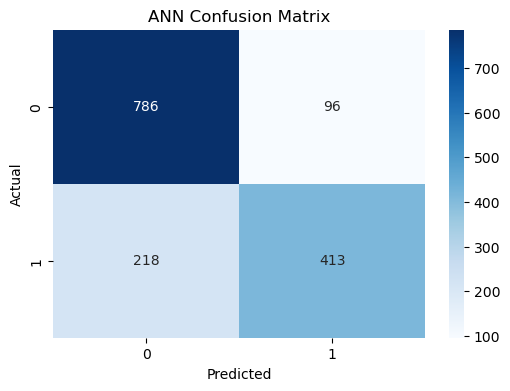

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ANN Predictions
max_len = 50 
X_test_pad = pad_sequences(X_test, maxlen=max_len, padding='post')
y_pred_ann = (model_ann.predict(X_test_pad) > 0.5).astype(int)

# ANN Evaluation Metrics
ann_accuracy = model_ann.evaluate(X_test_pad, y_test, verbose=0)[1]
ann_precision = precision_score(y_test, y_pred_ann)
ann_auc = roc_auc_score(y_test, y_pred_ann)
ann_cm = confusion_matrix(y_test, y_pred_ann)

print("🔷 ANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann))
print(f"ANN Accuracy: {ann_accuracy:.4f}")
print(f"ANN Precision: {ann_precision:.4f}")
print(f"ANN AUC: {ann_auc:.4f}")

# ANN Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(ann_cm, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## LSTM

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# X_train, X_val, y_train, y_val = train_test_split(X_pad, y, test_size=0.2, random_state=42)


# max_len = 50
X_train_pad = pad_sequences(X_train, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test, maxlen=max_len, padding='post')  # If you're going to evaluate later


In [ ]:
# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=64, input_length=50))
model_lstm.add(LSTM(64, return_sequences=False))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=2, restore_best_weights=True)

model_lstm.fit(X_train_pad, y_train, validation_data=(X_val_pad, y_val), 
               epochs=10, batch_size=32, callbacks=[early_stop])


Epoch 1/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 15s 57ms/step - accuracy: 0.6250 - loss: 0.6535 - val_accuracy: 0.7884 - val_loss: 0.4598
Epoch 2/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - accuracy: 0.8451 - loss: 0.3628 - val_accuracy: 0.7903 - val_loss: 0.4545
Epoch 3/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.9124 - loss: 0.2442 - val_accuracy: 0.7632 - val_loss: 0.5586
Epoch 4/10
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9384 - loss: 0.1738 - val_accuracy: 0.7579 - val_loss: 0.6531


In [ ]:
print(X_test_pad.shape)


(1513, 50)


In [ ]:
loss, accuracy = model_lstm.evaluate(X_test_pad, y_test)
print("LSTM Accuracy:", accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7831 - loss: 0.4773
LSTM Accuracy: 0.7785856127738953


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step  
🔶 LSTM Classification Report:

              precision    recall  f1-score   support

         0.0       0.79      0.84      0.82       882
         1.0       0.76      0.69      0.72       631

    accuracy                           0.78      1513
   macro avg       0.77      0.77      0.77      1513
weighted avg       0.78      0.78      0.78      1513

LSTM Accuracy: 0.7786
LSTM Precision: 0.7596
LSTM AUC: 0.7654


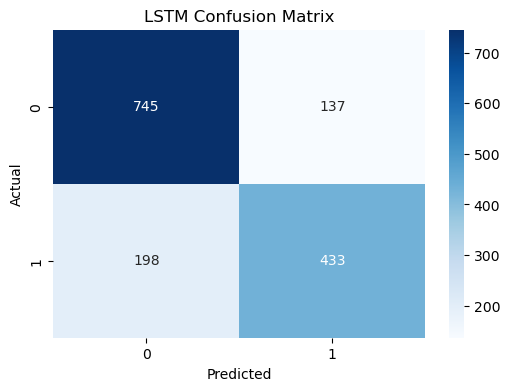

In [ ]:
# LSTM Predictions
y_pred_lstm = (model_lstm.predict(X_test_pad) > 0.5).astype(int)

# LSTM Evaluation Metrics
lstm_accuracy = model_lstm.evaluate(X_test_pad, y_test, verbose=0)[1]
lstm_precision = precision_score(y_test, y_pred_lstm)
lstm_auc = roc_auc_score(y_test, y_pred_lstm)
lstm_cm = confusion_matrix(y_test, y_pred_lstm)

print("🔶 LSTM Classification Report:\n")
print(classification_report(y_test, y_pred_lstm))
print(f"LSTM Accuracy: {lstm_accuracy:.4f}")
print(f"LSTM Precision: {lstm_precision:.4f}")
print(f"LSTM AUC: {lstm_auc:.4f}")

# LSTM Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [ ]:
model_ann.save("models/disaster_tweet_model_ann.h5")
model_lstm.save("models/disaster_tweet_model_lstm.h5")

In [ ]:
import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)